#### 데이터 로드 및 살펴보기

In [57]:
import pandas as pd
import numpy as np

In [58]:
# 압축해제된 파일들을 열어보면 csv형태로 들어가 있다
# 고객 정보 로드
# 고객 정보 컬럼 : 아이디, 나이, 성별, 직업, 주소(우편번호)
cols = ['uid','age','sex','job','zip_code']
users = pd.read_csv( './ml-100k/u.user', sep='|', names=cols )
users.shape

(943, 5)

In [59]:
users.head()

,uid,age,sex,job,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [60]:
# 영화 정보 로드
# 영화ID, 제목, 개봉일, 비디오개봉일, imdb 주소
m_cols = ['mid','title','release_date','video_release_date','imdb_url']
# 실제 데이터에 컬럼이 더 많은데, 앞에서부터 잘라서 적용하고 싶다
movies = pd.read_csv( './ml-100k/u.item', sep='|', names=m_cols, encoding='latin1', usecols=range(5) ) #usecols= : 필요없는 것 버리고 5개의 컬럼을 형성한다
movies.head()

,mid,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [61]:
movies.shape

(1682, 5)

- u.user : 고객정보
- u.item : 영화정보
- u.data : 평점정보

In [62]:
# 평점 정보
ratings_cols = ['uid','mid','rating','unix_timestamp']
ratings = pd.read_csv( './ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin1' )
ratings.shape

(100000, 4)

In [63]:
ratings.head()

,uid,mid,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [64]:
# unix_timestamp -> 우리가 알 수 있는 YYYY-MM-dd hh:mm:ss
# date라는 컬럼에 추가
ratings[ 'date' ] = pd.to_datetime(ratings['unix_timestamp'], unit='s') # to : 뭔가 넣어서 어딘가로 바꾸거나 가고 싶다?라는 의미에서 쓰인다

In [65]:
ratings.head()

,uid,mid,rating,unix_timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16


#### 데이터 준비/시각화/통찰

In [66]:
# 정보 통합
# movies, ratings, users
# movies, ratings => 이 2개를 병합을 진행 movies_ratings
movies_ratings = pd.merge( movies, ratings )
movies_ratings.head()

,mid,title,release_date,video_release_date,imdb_url,uid,rating,unix_timestamp,date
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088,1997-09-27 04:21:28
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411,1997-10-16 16:30:11
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426,1998-04-04 14:33:46
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324,1997-12-31 20:48:44


In [67]:
movies_ratings.shape

(100000, 9)

In [68]:
movie_lens = pd.merge( movies_ratings, users )
movie_lens.head() # 사용자별로 영화의 종류 하나씩 나와야 한다(mid를 보면 영화가 유저한명당 영화하나가 들어가는걸 볼 수 있다)

,mid,title,release_date,video_release_date,imdb_url,uid,rating,unix_timestamp,date,age,sex,job,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,1998-02-17 17:51:30,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,1998-02-17 18:20:08,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,1998-02-17 18:07:27,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,1998-02-17 17:31:36,60,M,retired,95076


In [69]:
movie_lens.shape

(100000, 13)

In [72]:
# 평가를 가장 많이 받은 작품 상위10개
movie_lens.title.value_counts()[:10]  # 타이틀의 값을 뽑아줌
# 인기가 아주 없는 영화는 빼고(평점 특정 개수 이하는 제외)[movie_lens.title.value_counts()[-10:]], 
# 보여지는 데이터를 기준으로 살펴보면 영화가 오래 될수록 평가를 많이 받는 경향이 보인다.

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64

In [78]:
# 제목기준으로 데이터를 나누는데, 평가의 개수, 평점 평균을 포함한 데이터프레임
# 인덱스에 title., 컬럼에 평가의 개수: size , 평점평균: mean ==> 재구성하는 스타일은 pivot.table
# .groupby('title'). : 인덱스로 이동,  {'rating'(1차레벨):[np.size, np.mean](2차레벨)} 
# rating : 1차 레벨 컬럼, np.size, np.mean: 2차 레벨의 컬럼
movie_state = movie_lens.groupby('title').agg( {'rating':[np.size, np.mean]} ) 
movie_state.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [79]:
# 2번째 방법( 내가 직접한 방법 , 틀렸다 ㅅㅂ)
pd.pivot_table( movie_lens, index=['title'], values=['rating'] aggfunc=[np.mean] ).head()

SyntaxError: invalid syntax (<ipython-input-79-a59137911b09>, line 2)

In [ ]:
# 평점을 받은 개수가 1개인 영화, 즉 소수의 평가를 받은 영화가 많다
# 평균의 수가 적으면 노이즈가 개입되기 쉽다
# 일정 횟수 이상인 경우(여기서는 100건을 기준으로 삼는다)만 대상으로 처리하겠다

In [91]:
# 평가의 개수가 100개 이상인 데이터만 대상 추출 -> 불리언인덱싱
# 시리즈로 뽑힘 : type(movie_state['rating']['size'])
best_100_over = movie_state['rating']['size'] >= 100

In [96]:
# 바로 집어넣어도 된다 movie_state[  movie_state['rating']['size'] >= 100 ]
# 오름 차순 정렬하시오 -> 평균 기준으로 하시오
# 변수명은 tmp
tmp = movie_state[ best_100_over ].sort_values( by=[ ( 'rating', 'mean' ) ], ascending=False )
tmp.head()

rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230

In [97]:
tmp.tail()

rating          
                        size      mean
title                                 
Spawn (1997)             143  2.615385
Event Horizon (1997)     127  2.574803
Crash (1996)             128  2.546875
Jungle2Jungle (1997)     132  2.439394
Cable Guy, The (1996)    106  2.339623

In [98]:
tmp.shape

(338, 2)

In [102]:
# 간단한 시각화
# 영화별 평점 개수 : x축
# 사용자별 평가 횟수 : y축
from matplotlib import pyplot as plt
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


In [104]:
# 사용자별 평점을 내린 개수
movie_lens.groupby('uid').size()[:10]

uid
1     272
2      62
3      54
4      24
5     175
6     211
7     403
8      59
9      22
10    184
dtype: int64

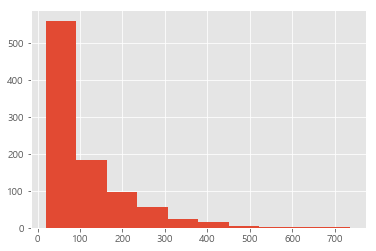

In [107]:
# 히스토그램
plt.style.use('ggplot')
movie_lens.groupby('uid').size().sort_values( ascending=False ).hist()
# 빈도가 낮아지는 그래프 모양 -> 길게 꼬리를 늘어뜨리는 모양이다 -> 롱테일분포
# '지프의 법칙'을 따르는 굴곡 모양이다
# 자연어 말뭉치 표현에 나타나는 단어들을 그 사용 빈도가 높은순으로 나열하면, 
# 모든 단어의 사용 빈도는 해당 단어의 빈도 순위에 반비례한다
# 영화의 평가가 많으면, 그 사용들 중에는 1회성 평가회수도 많다

In [108]:
# 사용자별 평가 회수, 평균
user_state = movie_lens.groupby('uid').agg( { 'rating' : [np.size, np.mean] } )
user_state.head()

rating          
      size      mean
uid                 
1      272  3.610294
2       62  3.709677
3       54  2.796296
4       24  4.333333
5      175  2.874286

In [109]:
user_state.shape

(943, 2)

In [110]:
# 사용자의 rating기준으로 생각해볼것
# 전체 지표의 표현
user_state['rating'].describe()
# 평균값 데이터를 보면, 최저 1.49점, 최대 4.87점, 25~75% 지점의 모두다 3.대에 머물러 있어서, 
# 일반적으로(평균적으로) 3.59점 정도는 받는다(3점 이상은 받는다)
# 3점 이하는 진짜 영화가 아닌것이다
# 최대 점수와 최저 점수는 편중된것으로 보인다

,size,mean
count,943.000000,943.000000
mean,106.044539,3.588191
std,100.931743,0.445233
min,20.000000,1.491954
25%,33.000000,3.323054
50%,65.000000,3.620690
75%,148.000000,3.869565
max,737.000000,4.869565


In [ ]:
# 추천 시스템을 위한 알고리즘을 작성해야한다(?)

#### 인수분해 머신을 이용한 추천 시스템 구성

- 행렬 인수분해라는 기능을 일반화한 알고리즘 -> 차원축소기법
- 회소 행렬을 다를 수 있는 알고리즘
- 특징끼리 영향을 주고 받는 상호작용 개념을 계산에 적용이 가능
- 범주형 변수를 더미 변수(파생변수)로 변환하여 범주간 상호 작용성도 계산 가능
- 알고리즘은 회귀, 분류, 학습 등도 가능
- C++로 만들어진 libFM이라는 알고리즘이 가장 유명 -> 파이썬으로 구성도니 fastFM

##### fastFM 제공 알고리즘

- ALS  : 교대 최소 제곱법
 > 장점: 예측 시간 빠름, SGD보다 하이퍼파라미터가 작다
 > 단점: 규제 반드시(필수)

- SGD  : 확률적 경사하강법( 딥러닝에서 사용 계획 )
 > 장점: 예측 시간 빠름, 대규모 데이터(빅데이터)를 빠르게 학습할 수 있다
 > 단점: 규제 반드시(필수), 하이퍼파라미터가 많다

- MCMC : 마르코프 연쇄 몬테카를로
 > 장점: 하이퍼파라미터가 작다. 자동 규제(알아서 적용이 된다)
 > 단점: 학습 시간이 다소 느림



- conda install fastFM (anaconda prompt에서 작성) -> 아나콘다 생태계에 존재하는지 유무 확인
- 없으면 pip install fastFM 작성후 사용
- 결국 윈도우에서는 사용할 수 없다는 것을 확인함 -> 도커에서 사용해야한다
- https://github.com/ibayer/fastFM 에서 사용법과 설치기준 등을 확인해볼 것

#### 도커 도입

- 사용하고자 하는 오픈소스 알고리즘(모듈)중에는 윈도우에서 수행이 불가능한 경우가 많다
- 도커를 이용하여 리눅스 생태계를 만들고, 거기서 fastFM을 설치후 주피터를 연결하여 개발을 이어가겠다

In [ ]:
# 도커 설치
# 1. 도커 가입
docker.com 으로 이동 (가입 진행)

# 2. 도커 다운로드 및 설치 (윈도우용)
https://hub.docker.com/?overlay=onboarding 다운로드 진행 [https://hub.docker.com/products/docker-desktop]
# 다운로드 및 설치 850MB

#[공식적으로는 windows 10 home 에디션 이하]
http://github.com/docker/toolbox/releases
# 다운로드 및 설치 실행 
# 체크박스는 전부 긍정 및 확인 눌러서 설치 진행하면 된다

# 3. 도커 콘솔 가동 (docker desktop이 생성된다(윈도우 시작버튼 눌러 확인할 것))->명령프롬프트 cmd 에서 docker->docker version 차례대로 입력
$ docker version

# 4. 컨테이너 이미지 다운로드(도커 허브에서 다운로드)
$ docker pull ubuntu:latest 실행
-> 네트워크가 안되는 사람(docker version 수행서 서버 접속 에러난 경우)
$ dockerCli.exe -SwitchDaemon
$ docker version
-> 위의 명령 수행수 확인할 것
-> 그래도 안되면 도케툴 설치후 도커툴에서 진행

or
$ docker pull ubuntu:18.04

# 5. 다운로드한 이미지 확인
$ docker images

# 6. 다운로드한 이미지 제거
$ docker rmi ubuntu:latest
- 확인
$ docker images

# 7. 컨테이너 이미지를 이용하여 컨테이너를 생성 및 로그인
# 단 포트는 컨테이너를 생성할 때 단 한번 세팅이 가능
# 포트하나당 -p 가 붙는다
# --name ml : 이름 지정
$ docker run -p 8888:8888 -p 8123:8123 --name ml -i -t ubuntu:latest /bin/bash # 리눅스루트 계정이 열림
=> -p 인바운드포트:아웃바운드포트, 1회만 세팅이 가능, 필요한 만큼 추가
=> --name 컨테이너 인스턴스의 이름
=> -i(interactive), -t(Pseudo-tty)이 옵션 추가하면 Bash shell에
   입력 및 출력을 수행할 수 있다
=> ubuntu:latest 설치할 이미지
=> /bin/bash 는 커맨드 쉘의 한 종류, 이를 사용하기 위해 명령어 입력    
    
# 8. 리눅스에서 빠져나가기
root@$ exit  # exit 실행하면 프롬프트 루트가 $ 바뀜

# 9. 컨테이너 인스턴스의 목록
$ docker ps -a # 컬럼 7개 나옴

# 10. 컨테이너 인스턴스 가동
$ docker start ml # 실행하고 
$ docker ps -a    # 다시 docker ps -a 실행하여 확인해볼 것

# 11. 재가동
$ docker restart ml

# 12. 접속
$ docker attach ml
root@$... 이러고 다시 열린다

# 13. 리눅스를 나가서, 컨테이너 인스턴스 제거
root@$ exit
$ docker rm ml




In [ ]:
# 14. 리눅스상에서 환경 구축
# 프롬프트는 계속 root@$ 로 나간다
root@$ apt-get update && apt-get -y upgrade

-> http://github.com/ibayer/fastFM 에서 sourcecode에서 명령어 가져오기
    
- 패키지 설치    
root@$ apt-get -y install python3-dev libopenblas-dev git python3-pip nano wget unzip

- fastFM 소스 다운로드 ( home 밑에 git clone이 위치하게 됨 )(requirement 등을 가져오는 과정)
root@$ cd home
root@$ git clone --recursive https://github.com/ibayer/fastFM.git
root@$ cd fastFM 
    
- 파이썬 라이브러리 설치
root@$ pip3 install -r ./requirements.txt

- 빌드 -> 중간이나 끝부분에 error 가 보일수도 있으나 무시해도 된다
root@$ PYTHON=python3 make 

- 패키지 설치
root@$ pip3 install
root@$ python3
>>> from fastFM import als
>>>
>>> exit()
root@$ pip3 install fastFM pandas matplotlib jupyter

- 쥬피터 노트북 가동
root@$ jupyter notebook --ip=0.0.0.0 --port=8123 --allow-root --no-browser  (웹브라우저 주소창에 주소 붙여넣기 할 것)
or 
root@$ jupyter notebook --ip=0.0.0.0 --allow-root ( 기본포트 8888 )


- 기본 PC에서 브라우저 접속
[toolbox 사용자]
도커 구동시 IP를 사용
docker is configured to use default machine with IP 192.168.99.100
http://192.168.99.100:8123/?token=a9040eff3be44a7c66ea24383e4523493b0cebef6e769e80

[일반 사용자]
http://http://127.0.0.1:8123/?token=a9040eff3be44a7c66ea24383e4523493b0cebef6e769e80

###### 도코를 써서 리눅스를 통해 쥬피터를 연결 